# Notebook to explore tidal analysis by harmonics

We begin by importing the necessary modules and loading some sample data. You can use any data here. The script expects time in yeardays and any variable measured at those times

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import detrend
from scipy.optimize import leastsq

In [2]:
df = pd.read_csv("sample_data/omura_temp_200m.csv")
df

,time_yday,temp_200m
0,22.540006,18.180888
1,22.540064,18.150695
2,22.540122,18.131770
3,22.540180,18.114070
4,22.540238,18.102906
...,...,...
1020,46.123154,17.839684
1021,46.123212,17.832506
1022,46.237460,17.929280
1023,46.237518,18.010209


Before we begin the tidal analysis, we plot the variable to see if there are any obvious sinusodal signals

[Text(0.5, 0, 'Time (yeardays of 2020)'),
 Text(0, 0.5, 'Conservative temperature at 200 m')]

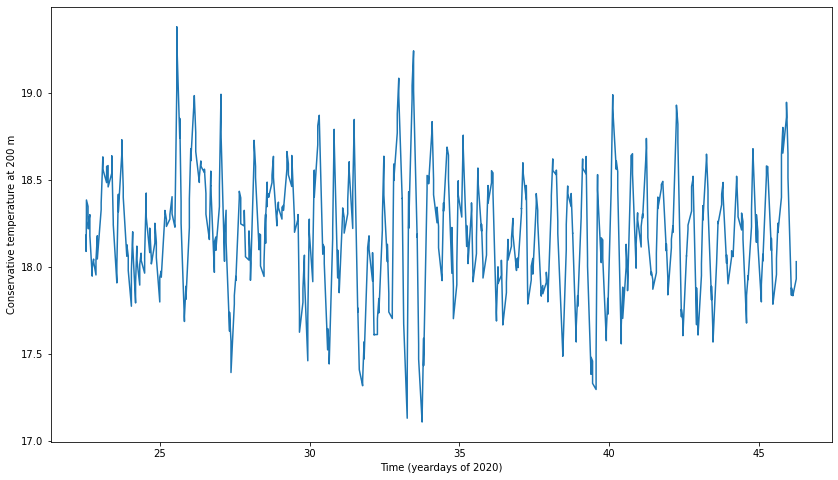

In [3]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(df.time_yday, df.temp_200m)
ax.set(xlabel='Time (yeardays of 2020)', ylabel='Conservative temperature at 200 m')

In [4]:
def tidal_analysis(t, x, T=[12.4206], detrend=True):
    """
    This function performs a harmonic analysis of timeseries x for a single
    or multiple tidal constituents including removal of trend and time-mean.
    :param t: time (yearday)
    :param x: variable (any units)
    :param T: tidal periods (hours) [T1,T2,T3,...] default: 12.4206 (M2)
    :detrend:  switch to remove trend as well as time-mean. Default=True
    :returns:
    
    xtrend: variable time-mean (same units as x)
            and variable trend (same units as x / same units as t)
    xamp:   amplitude of each tidal constituent (same units as x)
    xph:    phase of each tidal constituent (radians)
    xts:    timeseries of each tidal constituent (same units as x)
    xr:     residual timeseries (same units as x)
    stats:  regression statistics
             (R-square statistic, F statistic, p value, error variance)
    
    Original matlab function by Rob Hall (Aug 2014)
    Converted to Python by Callum Rollo (Sep 2020)
    """
    # Convert tidal periods to days
    T_days = T/24
    return t

In [5]:
x = df.temp_200m
t = df.time_yday
T = [12.4206]
detrend=True

# Convert tidal periods to days
T = np.array(T)
T_days = T/24

# number of tidal constituents
N = len(T)

# number of data points
nx = len(x)



# construct matrix
if detrend:
    A1 = np.zeros((nx,N*2+2))
else:
    A1 = np.zeros((nx,N*2+1))

# constant
A1[:,0] = 1

# tidal constituent loop
for n in range(N):
    # cos component of each tidal constituent
    A1[:,n*2+1] = np.cos(2*np.pi/T[n]*t)
    # sin component of each tidal constituent
    A1[:,n*2+2] = np.sin(2*np.pi/T[n]*t)
    
# linear trend
if detrend:
    A1[:,N*2+1] = np.linspace(0,1,nx);



# least squares fit

#A2 = A1';
#A = A2*A1;
#B = A2*x;
#C = A\B;

#[C,~,~,~,stats] = regress(x,A1);


SyntaxError: invalid syntax (<ipython-input-5-1e73b54a0331>, line 45)

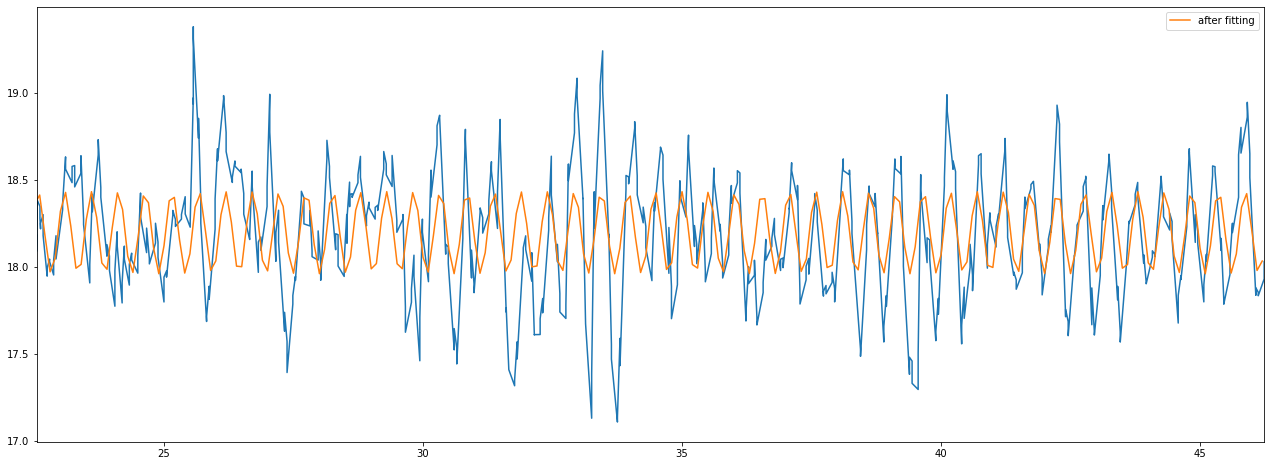

In [28]:
data = df.temp_200m
t = df.time_yday.values

guess_mean = np.mean(data)
guess_std = 3*np.std(data)/(2**0.5)/(2**0.5)
guess_phase = 0
guess_freq = 12
guess_amp = 1

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = guess_std*np.sin(t*guess_freq+guess_phase) + guess_mean

# Define the function to optimize, in this case, we want to minimize the difference
# between the actual data and our "guessed" parameters
optimize_func = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - data
est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]

# recreate the fitted curve using the optimized parameters
data_fit = est_amp*np.sin(est_freq*t+est_phase) + est_mean

# recreate the fitted curve using the optimized parameters

fine_t = np.arange(0,max(t),0.1)
data_fit=est_amp*np.sin(est_freq*fine_t+est_phase)+est_mean
fig, ax = plt.subplots(figsize=(22,8))
ax.plot(t, data,)
#ax.plot(t, data_first_guess, label='first guess')
ax.plot(fine_t, data_fit, label='after fitting')
ax.set(xlim=[t[0], t[-1]])
ax.legend()


In [32]:
est_phase + np.pi

-1.997965202896678

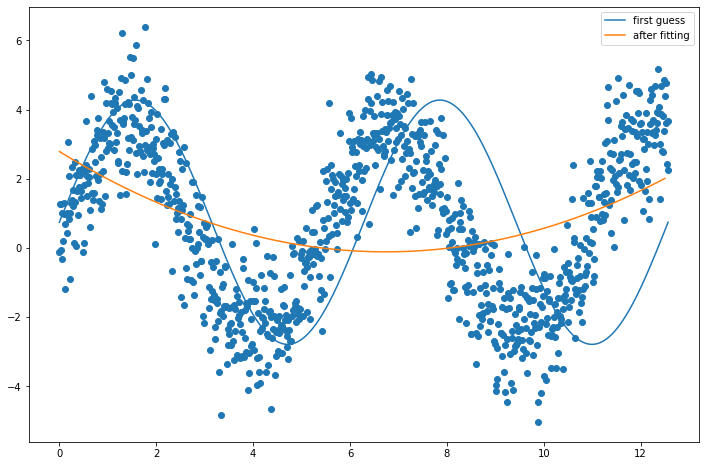

In [15]:
import numpy as np
from scipy.optimize import leastsq

N = 1000 # number of data points
t = np.linspace(0, 4*np.pi, N)
f = 1.15247 # Optional!! Advised not to use
data = 3.0*np.sin(f*t+0.001) + 0.5 + np.random.randn(N) # create artificial data with noise

guess_mean = np.mean(data)
guess_std = 3*np.std(data)/(2**0.5)/(2**0.5)
guess_phase = 0
guess_freq = 1
guess_amp = 1

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean

# Define the function to optimize, in this case, we want to minimize the difference
# between the actual data and our "guessed" parameters
optimize_func = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - data
est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]

# recreate the fitted curve using the optimized parameters
data_fit = est_amp*np.sin(est_freq*t+est_phase) + est_mean

# recreate the fitted curve using the optimized parameters

fine_t = np.arange(0,max(t),0.1)
data_fit=est_amp*np.sin(est_freq*fine_t+est_phase)+est_mean
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(t, data,)
ax.plot(t, data_first_guess, label='first guess')
ax.plot(fine_t, data_fit, label='after fitting')
ax.legend()


-0.23586620282003873

In [ ]:
A1

In [ ]:
T

I hope you found this notebook useful. Please direct any queries to c.rollo@uea.ac.uk